In [100]:
#Import Exoplanet Data

import os 
print(os.listdir("../astroML-project"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats 
%matplotlib inline


train_set = pd.read_csv("../astroML-project/missing.csv", names = ['Planet_name','Orbit_period','Planet_mass','Planet_radius',
                                                                'Planet_density','Distance','Effective_temp','Stellar_intensity','Stellar_mass','Stellar_radius','Habitable'])
                        
test_set = pd.read_csv("../astroML-project/composite_exo_planet.csv", names = ['Planet_name','Orbit_period'
                                                                ,'Planet_mass','Planet_radius','Planet_density','Distance','Effective_temp','Stellar_intensity','Stellar_mass','Stellar_radius','Habitable'])



['missing.csv', 'Exo-planets.ipynb', 'composite_exo_planet.csv', '.ipynb_checkpoints', '.git', 'README.md']


In [101]:
train_set.head()

,Planet_name,Orbit_period,Planet_mass,Planet_radius,Planet_density,Distance,Effective_temp,Stellar_intensity,Stellar_mass,Stellar_radius,Habitable
0,TRAPPIST-1 e,6.099615,0.62,0.918,4.40,12.10,2559.0,-3.281,0.08,0.12,1
1,Proxima Cen b,11.186000,1.27,1.080,5.54,1.29,3050.0,-2.810,0.12,0.14,1
2,Kepler-1229 b,86.828989,2.54,1.400,6.13,236.00,3784.0,-1.177,0.54,0.51,1
3,GJ 667 C f,39.026000,2.70,1.450,4.87,6.80,3350.0,-1.863,0.33,NaN,1
4,Kepler-442 b,112.305300,2.36,1.340,5.39,342.00,4402.0,-0.932,0.61,0.60,1


In [102]:
#Romoving NaN values from data

print (test_set.shape)
#test_set = test_set[:100]
test_set = test_set.dropna()
train_set = train_set.dropna()

#if data set has nan values
#Check for missing data & list them 
datasetHasNan = False
if train_set.count().min() == train_set.shape[0] and test_set.count().min() == test_set.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan') 
if datasetHasNan == True:
    nas = pd.concat([train_set.isnull().sum(), test_set.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    #print (nas)
    print(nas[nas.sum(axis=1) > 0])

(3868, 11)
We do not need to worry about missing values.


In [103]:
#Merging train data and test data

all_data = train_set.append(test_set)
all_data = all_data.sample(frac=1).reset_index(drop=True)

labels = all_data['Habitable']
#le = LabelEncoder()
#labels = le.fit_transform(labels) 

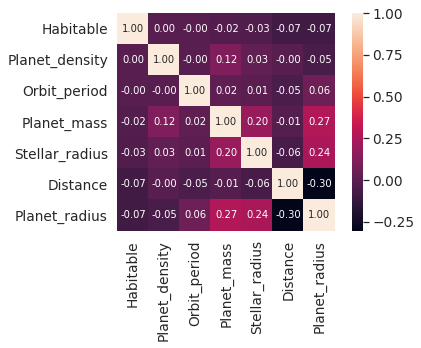

In [104]:
#Data Analysis

#Correlation Analysis
#Habitable Correlation matrix
corrmat = all_data.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Habitable')['Habitable'].index
cm = np.corrcoef(all_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


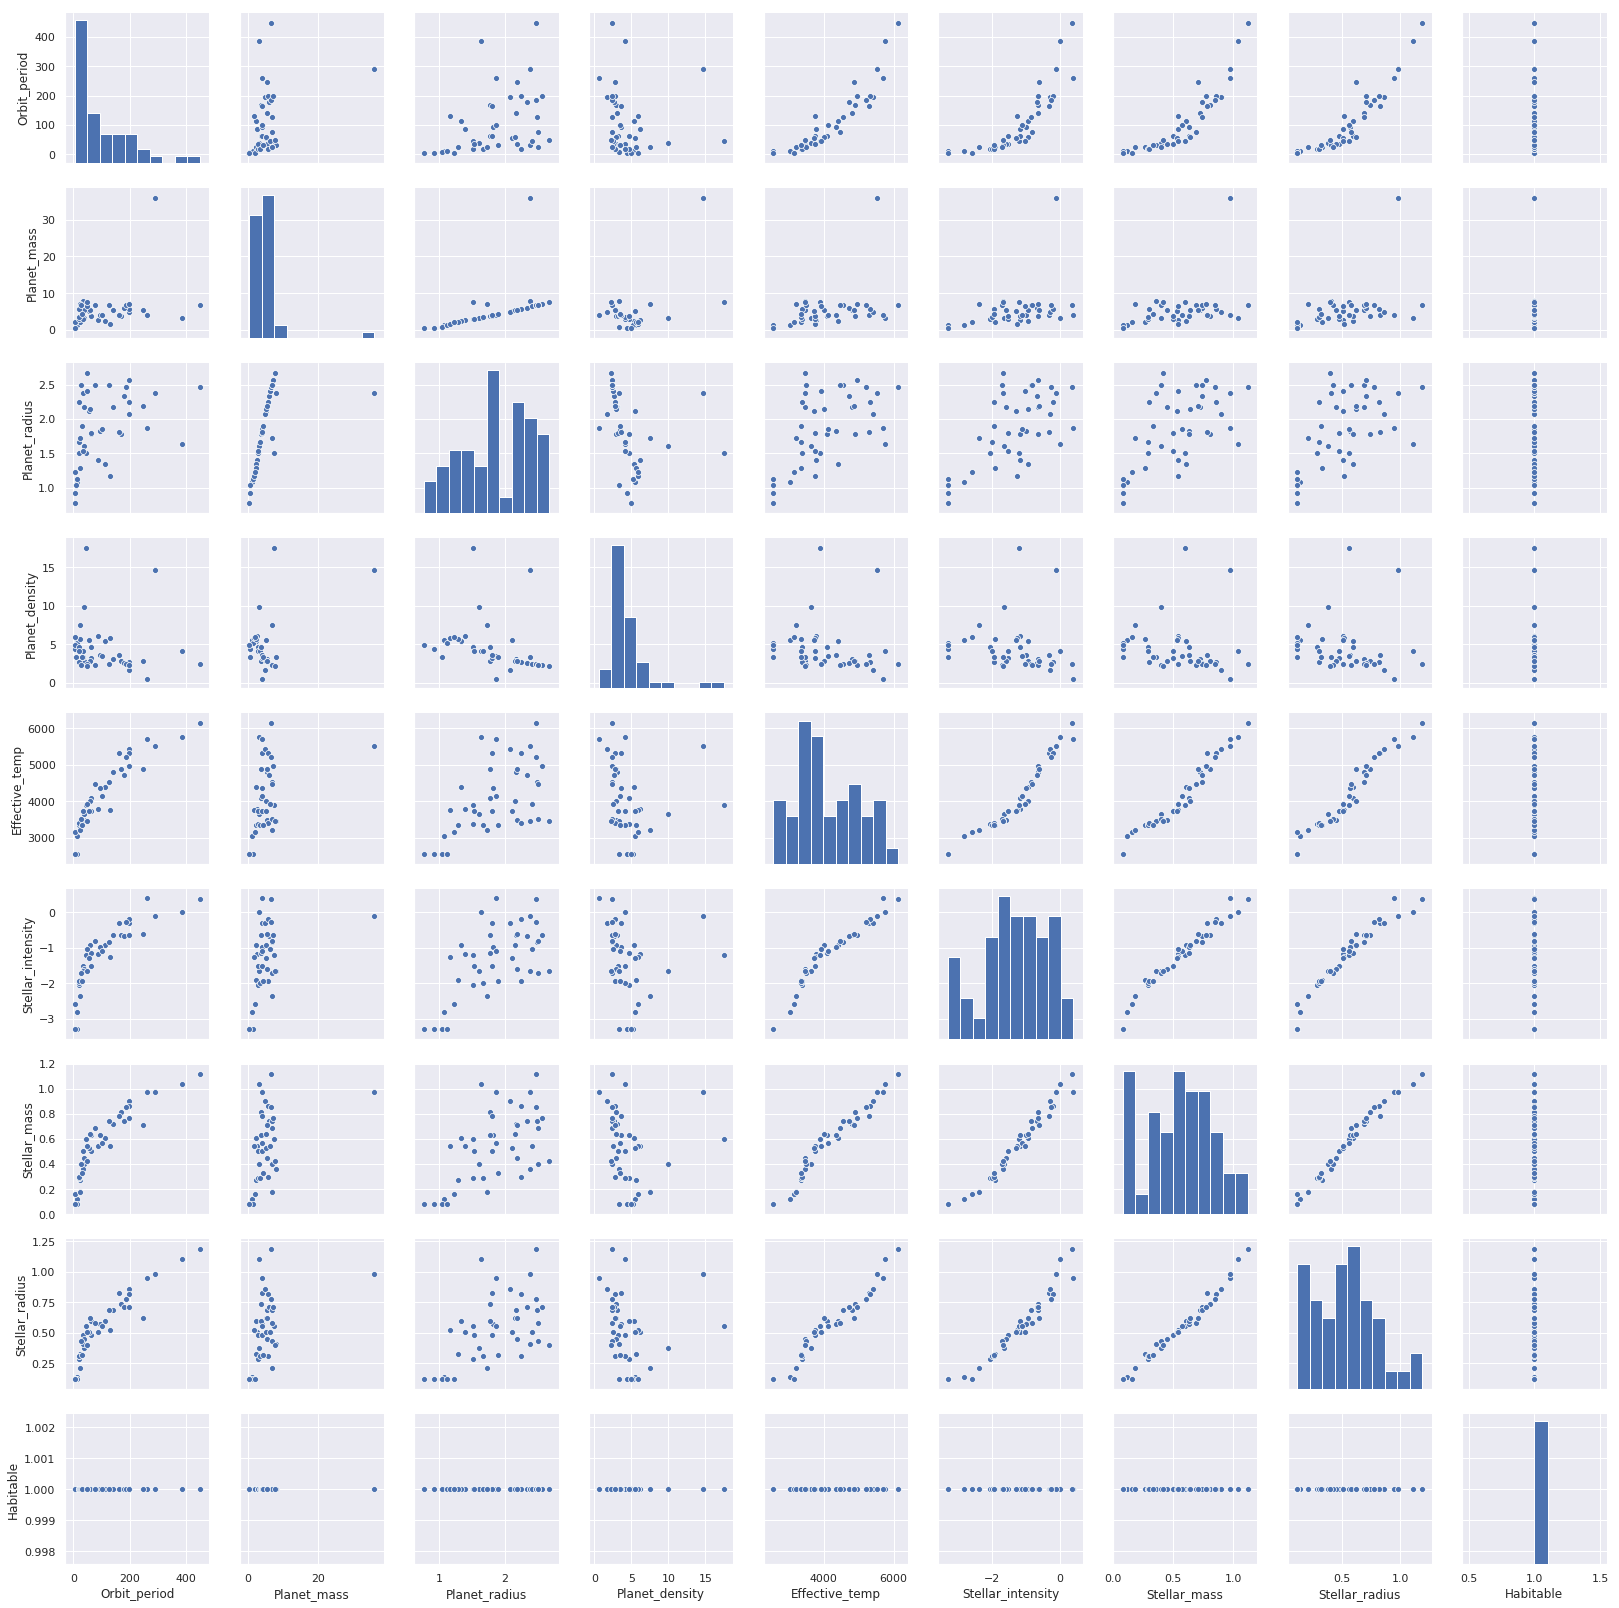

In [105]:
#Scatter-Plots for various features 

sns.set()
cols = ['Orbit_period','Planet_mass','Planet_radius','Planet_density','Effective_temp','Stellar_intensity','Stellar_mass','Stellar_radius','Habitable']
#cols = ['Habitable']
sns.pairplot(train_set[cols], height = 2.5)
plt.show();

In [106]:
# Drop irrelevant columns
all_data=all_data.drop("Habitable",axis=1)
all_data=all_data.drop("Planet_name",axis=1)

In [107]:
labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3652    0
3653    0
3654    0
3655    0
3656    0
3657    0
3658    0
3659    0
3660    0
3661    0
3662    0
3663    0
3664    0
3665    0
3666    0
3667    0
3668    0
3669    0
3670    0
3671    0
3672    0
3673    0
3674    0
3675    0
3676    1
3677    0
3678    0
3679    0
3680    0
3681    0
Name: Habitable, Length: 3682, dtype: int64

In [85]:
pass

In [86]:
#Classification Logistic Regression 

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(all_data, labels, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression().fit(features_train,labels_train)
pred = lgr.predict(features_test)
predictions = lgr.predict(features_train)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1086
          1       0.00      0.00      0.00        19

avg / total       0.97      0.98      0.97      1105

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2552
          1       0.00      0.00      0.00        25

avg / total       0.98      0.99      0.99      2577



/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [88]:
from sklearn.svm import SVC

svc = SVC().fit(features_train,labels_train)

pred = svc.predict(features_test)

predictions = svc.predict(features_train)


In [89]:
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1086
          1       0.00      0.00      0.00        19

avg / total       0.97      0.98      0.97      1105

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2552
          1       1.00      1.00      1.00        25

avg / total       1.00      1.00      1.00      2577



/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [90]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier().fit(features_train,labels_train)

pred = rfr.predict(features_test)

predictions = rfr.predict(features_train)


In [91]:
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      1086
          1       0.50      0.16      0.24        19

avg / total       0.98      0.98      0.98      1105

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2552
          1       1.00      0.92      0.96        25

avg / total       1.00      1.00      1.00      2577

